In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
#Use the iris dataset
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

## Analyze the data format and information

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
#Use petal length and petal width to build the classification model
x=iris['data'][:,3:]
#Sperate to virginica and not virginica
y=(iris['target']==2).astype(np.int)

## Fit Logistic Regression

In [8]:
log_reg=LogisticRegression()
log_reg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
#Give lots of different petal width to predict whether it belongs to iris-virginca
x_new=np.linspace(0,3,1000).reshape(-1,1)
#Predict_proba is the probabilities that belong to 0 or 1
y_proba=log_reg.predict_proba(x_new)
#Find the seperation point of petal width
decision_boundary=x_new[y_proba[:,1] >= 0.5][0]

## Start to plot

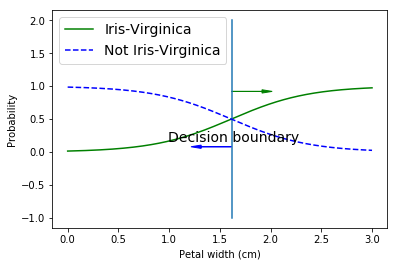

In [16]:
plt.plot(x_new,y_proba[:,1],'g-',label='Iris-Virginica')
plt.plot([decision_boundary,decision_boundary],[-1,2])
plt.plot(x_new,y_proba[:,0],'b--',label='Not Iris-Virginica')
plt.text(decision_boundary+0.02,0.15,
            'Decision boundary',fontsize=14,color='k',ha='center')
plt.arrow(decision_boundary,0.08,-0.3,0,head_width=0.05,head_length=0.1,fc='b',ec='b')
plt.arrow(decision_boundary,0.92,0.3,0,head_width=0.05,head_length=0.1,fc='g',ec='g')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend(loc='best',fontsize=14)

## If probability > 0.5, the predict result is 'Not Iris-Virginica, or is 'Iris-Virginica, and the figure is the same as the Logistic Regression formula figure. Sigmoid function:
$$ \left(\frac{1}{1+\exp(-t)}\right)$$